In [21]:
import yfinance as yf
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

[*********************100%***********************]  2 of 2 completed


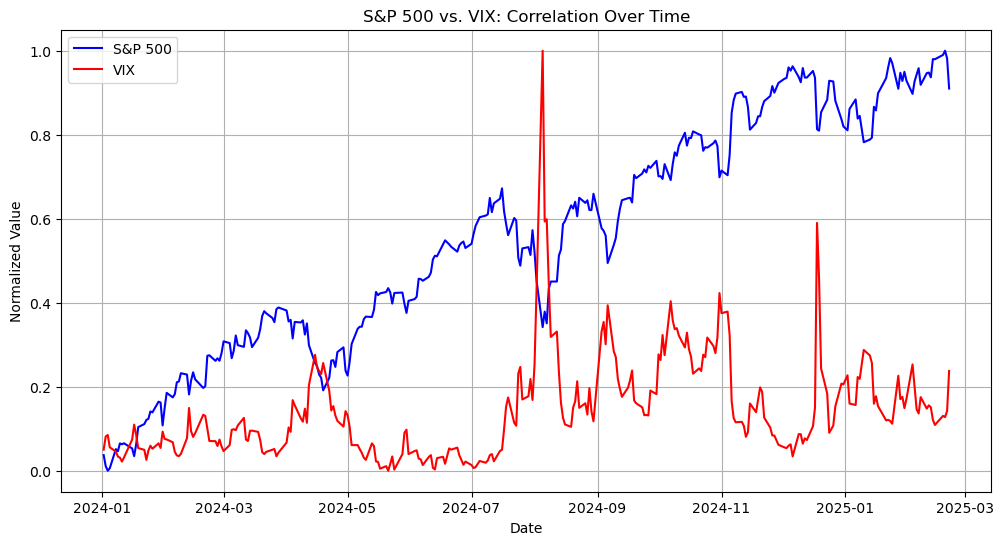

In [3]:
# tickers
tickers = ["^GSPC", "^VIX"]

# Fetch data from yf for daily 
data = yf.download(tickers, start="2024-01-01", end="2025-03-03", interval="1d")["Close"]

# Rename columns for clarity
data.columns = ["S&P 500", "VIX"]

# Drop any missing values from yf
data.dropna(inplace=True)

# Normalize data
data_normalized = (data - data.min()) / (data.max() - data.min())

# Chart
plt.figure(figsize=(12, 6))
plt.plot(data_normalized.index, data_normalized["S&P 500"], label="S&P 500", color="blue")
plt.plot(data_normalized.index, data_normalized["VIX"], label="VIX", color="red")
plt.title("S&P 500 vs. VIX: Correlation Over Time")
plt.xlabel("Date")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid()
plt.show()

[*********************100%***********************]  2 of 2 completed


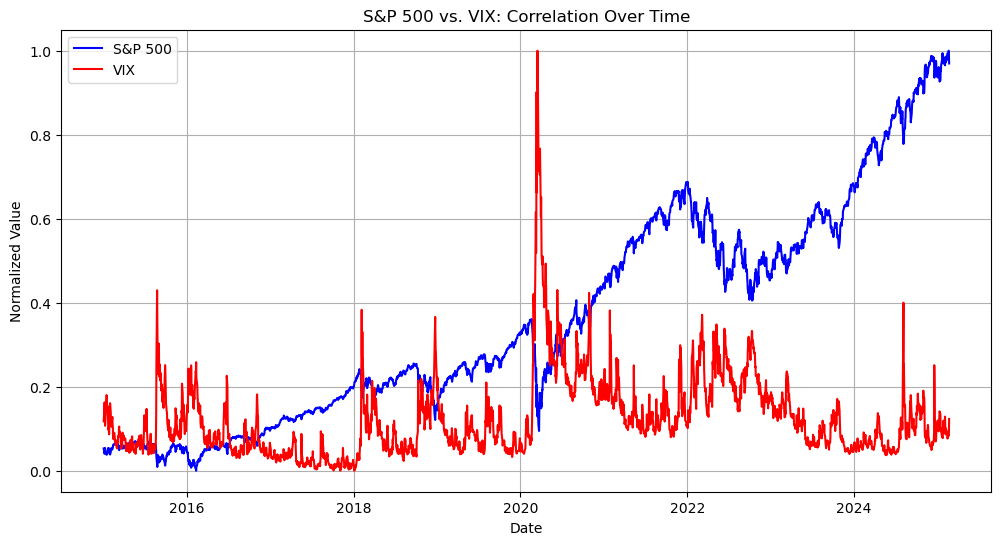

In [25]:
tickers = ["^GSPC", "^VIX"]
data = yf.download(tickers, start="2015-01-01", end="2025-03-03", interval="1d")["Close"]

data.columns = ["S&P 500", "VIX"]
data.dropna(inplace=True)
data_normalized = (data - data.min()) / (data.max() - data.min())

plt.figure(figsize=(12, 6))
plt.plot(data_normalized.index, data_normalized["S&P 500"], label="S&P 500", color="blue")
plt.plot(data_normalized.index, data_normalized["VIX"], label="VIX", color="red")
plt.title("S&P 500 vs. VIX: Correlation Over Time")
plt.xlabel("Date")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid()
plt.show()

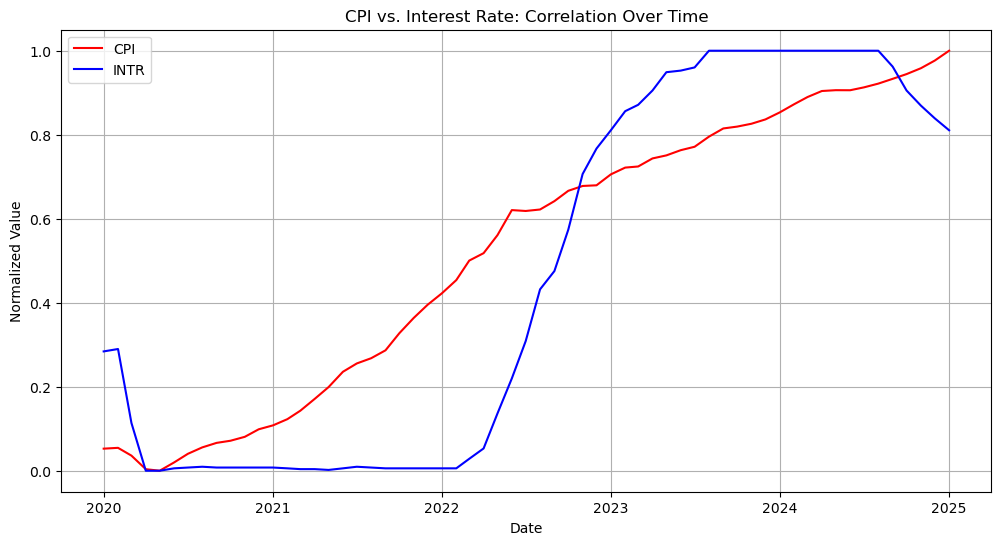

Correlation between CPI and Interest Rate: 0.90


In [19]:
# Fetch CPI and Interest Rate data from FRED
cpi = web.DataReader("CPIAUCSL", "fred", "2020-01-01", "2025-03-01") 
interest_rate = web.DataReader("FEDFUNDS", "fred", "2019-01-01", "2025-03-01")  

# Merge the data on dates
data = pd.merge(cpi, interest_rate, left_index=True, right_index=True, how="inner")

# Rename columns
data.columns = ["CPI", "INTR"]

# Normalize the data for better visualization
data_normalized = (data - data.min()) / (data.max() - data.min())

# Chart
plt.figure(figsize=(12, 6))
plt.plot(data_normalized.index, data_normalized["CPI"], label="CPI", color="red")
plt.plot(data_normalized.index, data_normalized["INTR"], label="INTR", color="blue")
plt.title("CPI vs. Interest Rate: Correlation Over Time")
plt.xlabel("Date")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid()
plt.show()

# Compute correlation
correlation = data["CPI"].corr(data["INTR"])
print(f"Correlation between CPI and Interest Rate: {correlation:.2f}")

[*********************100%***********************]  1 of 1 completed


Estimated average S&P 500 value at year-end: 6301.27


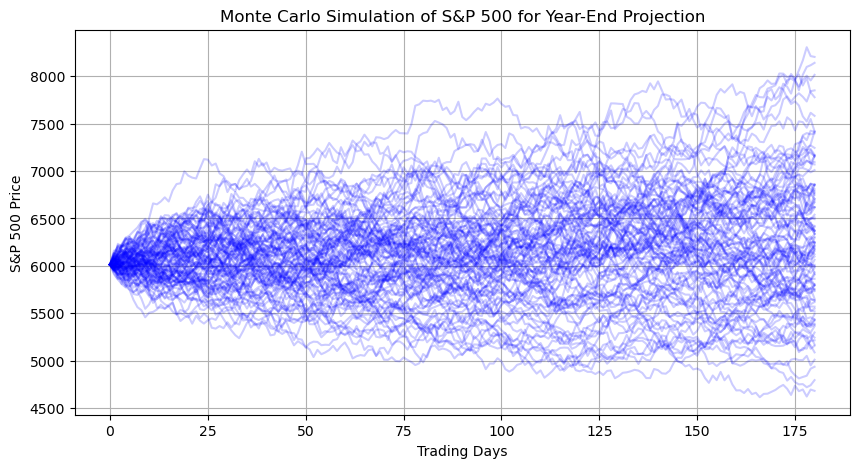

In [100]:
# Fetch data
sp500_data = yf.download("^GSPC", start="2020-01-01", end="2025-03-03", interval="1d")["Close"]

# Calculate log returns
log_returns = np.log(sp500_data / sp500_data.shift(1)).dropna()

# MC parameters
S0 = sp500_data.iloc[-1] 
mu = log_returns.mean()[0] * 100
sigma = log_returns.std()[0] * 10
T = 1  
I = 100000  
N = 180  
dt = T / N  

# all paths start at S0
S = np.full((N + 1, I), S0)

for t in range(1, N + 1):
    Z = np.random.standard_normal(I) 
    S[t] = S[t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)

# Compute the expected value of S&P 500 at year-end
expected_sp500 = np.mean(S[-1])

# Display results
print(f"Estimated average S&P 500 value at year-end: {expected_sp500:.2f}")

# Plot simulation paths
plt.figure(figsize=(10, 5))
plt.plot(S[:, :100], alpha=0.2, color="blue")  # Plot 100 paths for visualization
plt.title("Monte Carlo Simulation of S&P 500 for Year-End Projection")
plt.xlabel("Trading Days")
plt.ylabel("S&P 500 Price")
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed


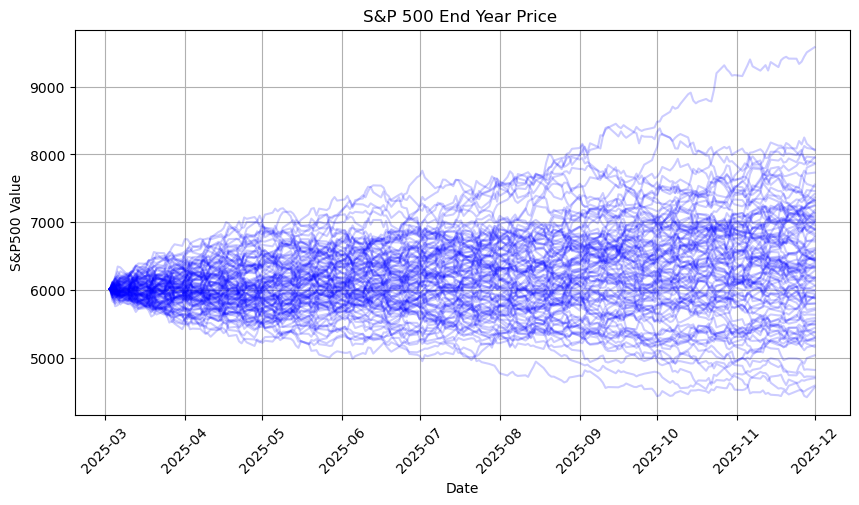

Estimated average S&P 500 value at year-end: 6310.84


In [106]:
# Fetch data
sp500_data = yf.download("^GSPC", start="2020-01-01", end="2025-03-03", interval="1d")["Close"]

# Calculate log returns
log_returns = np.log(sp500_data / sp500_data.shift(1)).dropna()

# MC parameters
S0 = sp500_data.iloc[-1] 
mu = log_returns.mean()[0] * 100
sigma = log_returns.std()[0] * 10
T = 1  # Time horizon in years
I = 10000  # Number of simulations
N = 195  # Trading days until end of 2025
dt = T / N  # Time step

# Generate date range for x-axis
start_date = pd.to_datetime("2025-03-03")  
date_range = pd.date_range(start=start_date, periods=N + 1, freq="B") 

# Initialize S0 for all I
S = np.full((N + 1, I), S0)

# MC simulations
for t in range(1, N + 1):
    Z = np.random.standard_normal(I)
    S[t] = S[t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)



# Plot simulations
plt.figure(figsize=(10, 5))
plt.plot(date_range, S[:, :100], alpha=0.2, color="blue")  
plt.title("S&P 500 End Year Price ")
plt.xlabel("Date")
plt.ylabel("S&P500 Value")
plt.grid()
plt.xticks(rotation=45)
plt.show()

# average of all simulations
expected_sp500 = np.mean(S[-1])
print(f"Estimated average S&P 500 value at year-end: {expected_sp500:.2f}")